<a href="https://colab.research.google.com/github/ShesterG/Twitter-Sentiment-Analysis/blob/master/notebooks/01_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA for Twitter Sentiment Analysis

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


# Imports & Constants

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [3]:
DATA_FILE_PATH = '/content/drive/MyDrive/NLPGh/'
DATA_FILE_NAME = 'Book7Original.csv'
SAVE_FILE = True


# Read Data File

In [4]:
df = pd.read_csv(DATA_FILE_PATH + DATA_FILE_NAME, encoding = "ISO-8859-1")

In [5]:
df.rename(columns={'prep_tweet': 'pretweet'}, inplace=True)

# Initial Review of Data

In [6]:
df.head()

,Unnamed: 0,tweet,location_x,pretweet,candidate,LRPredScore,LRConfi,Sentiment,Unnamed: 8
0,0,@NsiaAvena @NAkufoAddo They don't know anythin...,NaN,they dont know anyth about peac,Nana,NaN,NaN,-1,NaN
1,4,@BarrowPresident @NAkufoAddo good to go may Go...,NaN,good may god bless protect you,Nana,NaN,NaN,1,NaN
2,10,"Mr President, receive the GRACE OF GOD ALMIGHT...","Accra, Ghana",presid receiv the grace god almighti what ha o...,Nana,1.0,1.0,1,NaN
3,11,@stonebwoyb @NAkufoAddo 1gad I can't believe i...,NaN,1gad cant believ itu are congratul dem npp par...,Nana,-1.0,1.0,-1,NaN
4,12,@NAkufoAddo Please may God continue to strengt...,NaN,pleas may god continu strengthen you more pleas,Nana,-2.0,1.0,1,NaN


In [7]:
dfJohn = df[df['candidate']=='John']
dfJohn = dfJohn.groupby('Sentiment').head(500)

In [9]:
dfNana = df[df['candidate']=='Nana']
dfNana = dfNana.groupby('Sentiment').head(500)

In [12]:
frames = [dfNana,dfJohn]
df = pd.concat(frames)

In [13]:
df.head()

,Unnamed: 0,tweet,location_x,pretweet,candidate,LRPredScore,LRConfi,Sentiment,Unnamed: 8
0,0,@NsiaAvena @NAkufoAddo They don't know anythin...,NaN,they dont know anyth about peac,Nana,NaN,NaN,-1,NaN
1,4,@BarrowPresident @NAkufoAddo good to go may Go...,NaN,good may god bless protect you,Nana,NaN,NaN,1,NaN
2,10,"Mr President, receive the GRACE OF GOD ALMIGHT...","Accra, Ghana",presid receiv the grace god almighti what ha o...,Nana,1.0,1.0,1,NaN
3,11,@stonebwoyb @NAkufoAddo 1gad I can't believe i...,NaN,1gad cant believ itu are congratul dem npp par...,Nana,-1.0,1.0,-1,NaN
4,12,@NAkufoAddo Please may God continue to strengt...,NaN,pleas may god continu strengthen you more pleas,Nana,-2.0,1.0,1,NaN


In [50]:
df = df.groupby('Sentiment').head(500)

## What are the categorical values?

In [51]:
#df.emotion_in_tweet_is_directed_at.value_counts(dropna=False)

In [14]:
df.Sentiment.value_counts()

 1    1000
-1    1000
Name: Sentiment, dtype: int64

In [15]:
df.candidate.value_counts()

John    1000
Nana    1000
Name: candidate, dtype: int64

## Check for missing data

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 2218
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   2000 non-null   int64  
 1   tweet        2000 non-null   object 
 2   location_x   1247 non-null   object 
 3   pretweet     2000 non-null   object 
 4   candidate    2000 non-null   object 
 5   LRPredScore  1630 non-null   float64
 6   LRConfi      1630 non-null   float64
 7   Sentiment    2000 non-null   int64  
 8   Unnamed: 8   0 non-null      float64
dtypes: float64(3), int64(2), object(4)
memory usage: 156.2+ KB


In [17]:
print('Number of missing values per feature')
df.isna().sum()

Number of missing values per feature


Unnamed: 0        0
tweet             0
location_x      753
pretweet          0
candidate         0
LRPredScore     370
LRConfi         370
Sentiment         0
Unnamed: 8     2000
dtype: int64

In [18]:
print('Percentage of missing values per feature')
round(df.isna().sum() * 100 / len(df), 2)

Percentage of missing values per feature


Unnamed: 0       0.00
tweet            0.00
location_x      37.65
pretweet         0.00
candidate        0.00
LRPredScore     18.50
LRConfi         18.50
Sentiment        0.00
Unnamed: 8     100.00
dtype: float64

What are all the rows with missing data?

In [19]:
df_missing_target = df[df.Sentiment.isna()]

In [20]:
df_missing_target

,Unnamed: 0,tweet,location_x,pretweet,candidate,LRPredScore,LRConfi,Sentiment,Unnamed: 8


In [58]:
#df_missing_target.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

In [59]:
#df_missing_target.is_there_an_emotion_directed_at_a_brand_or_product.value_counts(normalize=True)

## Clean Data

* Delete the line with no Sentiment

In [21]:
df_clean = df.dropna(subset=['Sentiment'])

In [61]:
#df_clean = df_clean[df_clean.is_there_an_emotion_directed_at_a_brand_or_product != "I can't tell"]

In [62]:
#df_clean.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

In [63]:
# change all mentions to @mention (some were already switched but not all)

#df_clean.tweet_text = df_clean.tweet_text.apply(lambda x: re.sub("@[A-Za-z0-9]+", "@mention", x))

## Save Cleaned Data File

In [22]:
CLEAN_DATA_FILE_NAME = 'Book8Clean.csv'

In [23]:
if SAVE_FILE:
    df_clean.to_csv(DATA_FILE_PATH + CLEAN_DATA_FILE_NAME, index=False)

## Visualize Data

## Distribution of Classes

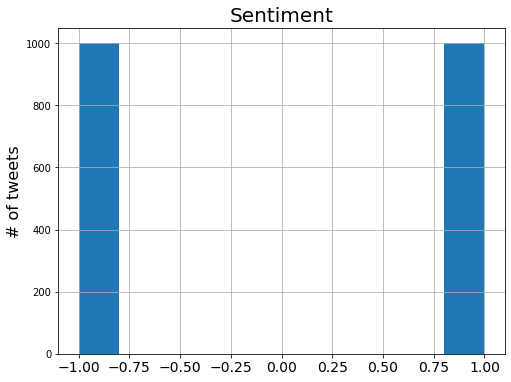

In [24]:
plt.figure(figsize=(8,6))
df_clean.Sentiment.hist(xlabelsize=14)
plt.title('Sentiment', fontsize=20)
plt.ylabel('# of tweets', fontsize=16)
plt.show()

The labels are perfectly balanced as a binary classification problem with Positive vs. Negative emotions.

## How long are the tweets?

In [25]:
df_clean['tweet_len'] = df_clean.pretweet.apply(len)

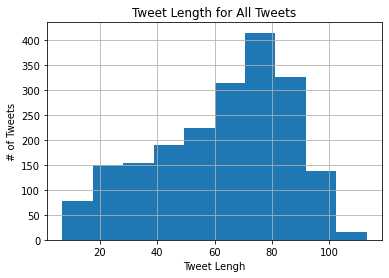

In [26]:
df_clean.tweet_len.hist()
plt.title('Tweet Length for All Tweets')
plt.xlabel('Tweet Lengh')
plt.ylabel('# of Tweets')
plt.show()

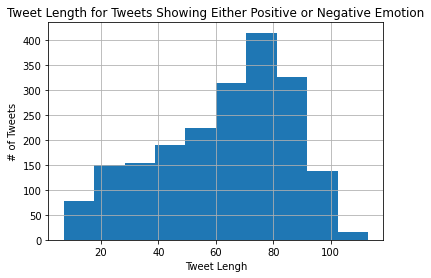

In [27]:
df_clean[df_clean.Sentiment != 0].tweet_len.hist()
plt.title('Tweet Length for Tweets Showing Either Positive or Negative Emotion')
plt.xlabel('Tweet Lengh')
plt.ylabel('# of Tweets')
plt.show()

In [28]:
df_clean.tweet_len.max()

113

In [29]:
pd.set_option('display.max_colwidth', None)

In [30]:
df_clean[df_clean.tweet_len > 100].head()

,Unnamed: 0,tweet,location_x,pretweet,candidate,LRPredScore,LRConfi,Sentiment,Unnamed: 8,tweet_len
279,2517,"Nana Addo, please for one of your first projects, kindly come and complete the Tanoso-Abuakwa dual carriageway for us we begÃ°Å¸ËÂ­Ã°Å¸â¢ï¿½Ã°Å¸ï¿½Â¾ @NAkufoAddo",NaN,nana addo pleas for one your first project kindli come and complet the tanosoabuakwa dual carriageway for beg,Nana,-2.0,1.0,-1,NaN,109
287,2637,@NAkufoAddo To God be all the glory. May God grant you Supernatural understanding to lead the Nation alright. Congratulations your Excelleny,NaN,god all the glori may god grant you supernatur understand lead the nation alright congratul your excelleni,Nana,1.0,1.0,1,NaN,106
419,6681,"Good Woman, #Vote Campaign Compares #FreeSHS - The 8.8 million women campaign supports the Free SHS policy of PresiÃ¢â¬Â¦ https://t.co/unN54sbh0j","Accra ,Ghana",good woman vote campaign compar freesh the 88 million women campaign support the free sh polici presi,Nana,3.0,1.0,1,NaN,101
428,7010,#JohnMahama2020 \n\nPlease lets all come together to rescue Ghana from #dishonest and #corrupt family and friends govÃ¢â¬Â¦ https://t.co/JEtk17qbF3,Ghana,johnmahama2020 pleas let all come togeth rescu ghana from dishonest and corrupt famili and friend gov,Nana,-3.0,1.0,-1,NaN,101
464,8188,"May the good Lord continue to keep you safe, healthy and wise. We thank God for how far he has brought you and allÃ¢â¬Â¦ https://t.co/f5QbG6FMH7",NaN,may the good lord continu keep you safe healthi and wise thank god for how far ha brought you and all,Nana,3.0,1.0,1,NaN,101
